<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [49]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [50]:
#  Replacing nan values in ConvertedComp Col

median = df['ConvertedComp'].median()

"""
df['ConvertedComp'].replace(np.NaN, median)
"""

df['ConvertedComp'] = df['ConvertedComp'].fillna(median)

Text(0, 0.5, 'Freq. Count')

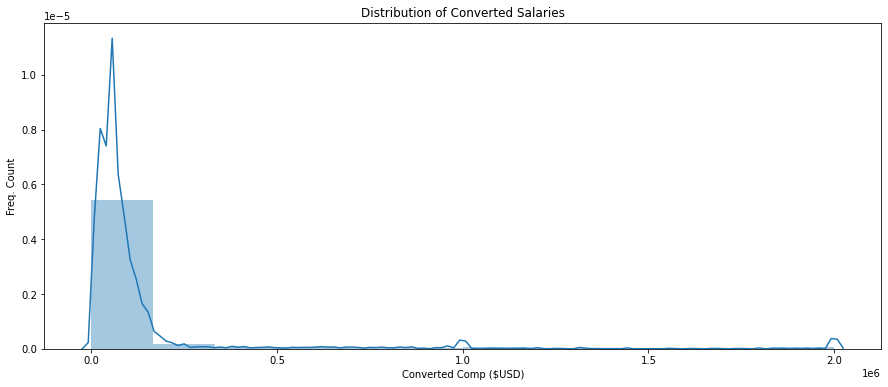

In [51]:
# DISTRIBUTION PLOT OF CONVERTEDCOMP - DISPLOT using sns - working code
# Trying to plot y vs yHat to show disparity

from   statsmodels.formula.api import ols
import io
import requests


bins = np.linspace(min(df['ConvertedComp']), max(df['ConvertedComp']), 13)   #div into 12 bins
plt.figure(figsize=(15, 6),edgecolor='blue')
sns.distplot(df['ConvertedComp'],kde=True, bins=bins)

plt.title('Distribution of Converted Salaries')
plt.xlabel('Converted Comp ($USD)')
plt.ylabel('Freq. Count')

#ax1 = sns.distplot(df['ConvertedComp'], hist=False, color='red', label='Actual Values')
#sns.distplot(Yhat, hist=False, color='blue', label='Fitted Values', ax = ax1)

Text(0, 0.5, 'Freq. Count')

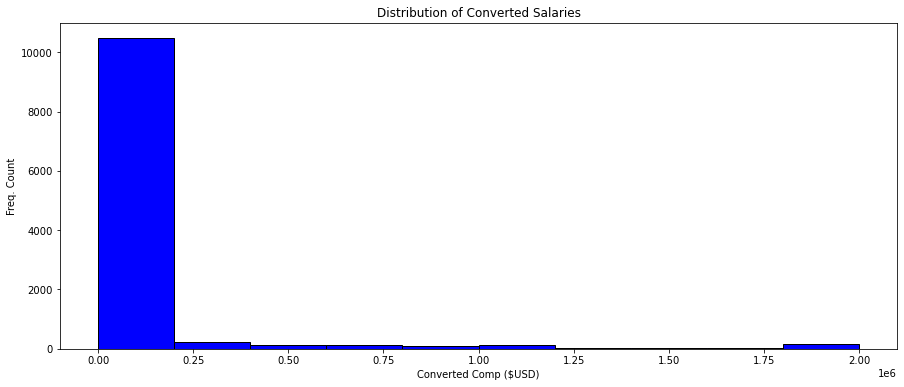

In [52]:
# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
# DISTRIBUTION PLOT for CONVERTEDCOMP column

import matplotlib.pyplot as plt

# matplotlib histogram - to show data distribution
bins = np.linspace(min(df['ConvertedComp']), max(df['ConvertedComp']), 13)   #div into 12 bins
plt.figure(figsize=(15, 6),edgecolor='blue')
plt.hist(df['ConvertedComp'], color = 'blue', edgecolor = 'black', bins = int(2000000/200000))

plt.title('Distribution of Converted Salaries')
plt.xlabel('Converted Comp ($USD)')
plt.ylabel('Freq. Count')

In [53]:
# your code goes here

print(df['ConvertedComp'].dtypes)

float64


In [54]:
print(df.dtypes)   #Get idea of data type

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              11398 non-null  int64  
 1   MainBranch              11398 non-null  object 
 2   Hobbyist                11398 non-null  object 
 3   OpenSourcer             11398 non-null  object 
 4   OpenSource              11317 non-null  object 
 5   Employment              11398 non-null  object 
 6   Country                 11398 non-null  object 
 7   Student                 11347 non-null  object 
 8   EdLevel                 11286 non-null  object 
 9   UndergradMajor          10661 non-null  object 
 10  EduOther                11234 non-null  object 
 11  OrgSize                 11302 non-null  object 
 12  DevType                 11333 non-null  object 
 13  YearsCode               11389 non-null  object 
 14  Age1stCode              11385 non-null

Plot the histogram for the column `ConvertedComp`.


Text(0.5, 0, 'Salaries ($USD)')

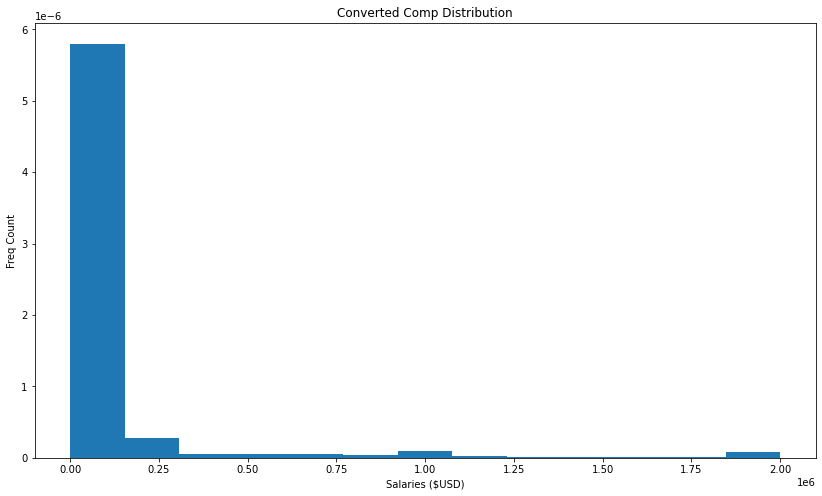

In [56]:
# your code goes here
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

"""
#Use Formula to get number of bins
q25, q75 = np.percentile(df['ConvertedComp'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['Age']) ** (-1/3)

#Use Formula to get number of bins
bins = abs(round((df['Age'].max() - df['Age'].min()) / bin_width))
"""

plt.figure(figsize=(14, 8), edgecolor='blue')
plt.hist(df['ConvertedComp'], density=True, bins=13)  # density=False would make counts
plt.title('Converted Comp Distribution')
plt.ylabel('Freq Count')
plt.xlabel('Salaries ($USD)')

#histConComp = df.hist(column='ConvertedComp', bins=12, grid=False, figsize=(12,6), color='green', zorder=2, rwidth=0.9)


Text(0.5, 0, 'Salaries ($USD)')

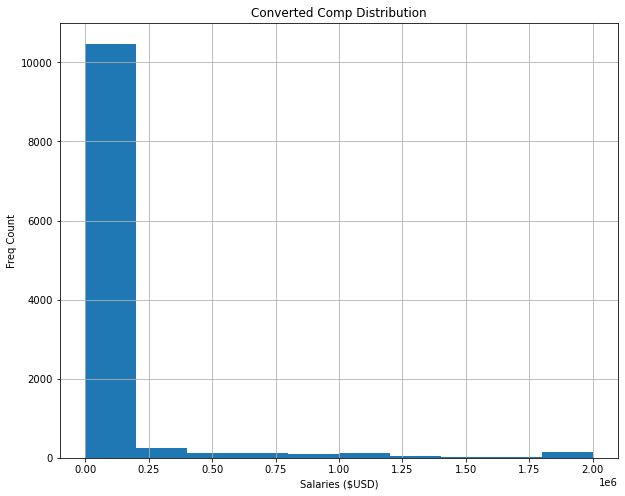

In [57]:
# Another version of ConvertedComp plot

plt.figure(figsize=(10, 8), edgecolor='blue')
#plt.hist(df['ConvertedComp'], density=True)  # density=False would make counts
ConvertedComp_hist = df['ConvertedComp'].hist()
plt.title('Converted Comp Distribution')
plt.ylabel('Freq Count')
plt.xlabel('Salaries ($USD)')


What is the median of the column `ConvertedComp`?



In [58]:
# your code goes here - Column MEDIAN
print('Median of CONVERTEDCOMP Colunn is {}'.format(df['ConvertedComp'].median()))


Median of CONVERTEDCOMP Colunn is 57745.0


#### MEDIAN OF AGE COLUMN

In [59]:
# Numerical summary of df Before Removal of NAN Values
dfCopy = df.copy()
#dfCopy - dfCopy.drop(columns=['Respondent'])
#df.describe()

In [60]:
#dfCopy.drop(['Respondent'])

In [61]:
# Before Removal of NAN Values
#df['Age'].min()
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11398.000000,1.058900e+04,1.139800e+04,11276.000000,8972.000000,11111.000000
mean,12490.392437,7.570477e+05,1.263096e+05,42.064606,4.781071,30.778895
std,7235.461999,9.705598e+06,2.846750e+05,24.672741,4.567060,7.393686
min,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,6264.250000,2.500000e+04,2.901600e+04,40.000000,2.000000,25.000000
50%,12484.000000,6.500000e+04,5.774500e+04,40.000000,4.000000,29.000000
75%,18784.750000,1.200000e+05,9.500000e+04,43.000000,5.000000,35.000000
max,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


In [62]:
#Code to assess NAN in Numeric fields

if df['WorkWeekHrs'].isnull().sum():  #See if any Missing Values
    meanWork = df['WorkWeekHrs'].mean()
    df['WorkWeekHrs'].replace(np.nan, meanWork, inplace=True)
    
if df['Age'].isnull().sum():  #See if any Missing Values
    meanAge = df['Age'].mean()
    df['Age'].replace(np.nan, meanAge, inplace=True)
    
if df['CompTotal'].isnull().sum():  #See if any Missing Values
    meanComp = df['CompTotal'].mean()
    df['CompTotal'].replace(np.nan, meanComp, inplace=True)
    
if df['ConvertedComp'].isnull().sum():  #See if any Missing Values
    meanCComp = df['ConvertedComp'].mean()
    df['ConvertedComp'].replace(np.nan, meanCComp, inplace=True)
    
if df['CodeRevHrs'].isnull().sum():  #See if any Missing Values
    meanCode = df['CodeRevHrs'].mean()
    df['CodeRevHrs'].replace(np.nan, meanCode, inplace=True)
    

In [63]:
#After Removal of NAN Values

#df['Age'].min()
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,11398.000000,1.139800e+04,1.139800e+04,11398.000000,11398.000000,11398.000000
mean,12490.392437,7.570477e+05,1.263096e+05,42.064606,4.781071,30.778895
std,7235.461999,9.354789e+06,2.846750e+05,24.540330,4.051929,7.299999
min,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000
25%,6264.250000,2.800000e+04,2.901600e+04,40.000000,2.000000,26.000000
50%,12484.000000,7.000000e+04,5.774500e+04,40.000000,4.781071,29.000000
75%,18784.750000,1.400000e+05,9.500000e+04,42.500000,5.000000,34.000000
max,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000


In [64]:
#  Replacing nan values in AGE Column

meanAge = df['Age'].mean()

"""
df['ConvertedComp'].replace(np.NaN, median)
"""

df['Age'] = df['Age'].fillna(meanAge)

In [65]:
df['Age'].isna().sum()

0

In [66]:
# your code goes here - Column AGE - Median value
print('Median of AGE Colunn is {}'.format(df['Age'].median()))


Median of AGE Colunn is 29.0


How many responders identified themselves only as a **Man**?


In [67]:
# your code goes here

"""
NumMale = sum(df['Gender'] == "Man")
#print("Number of Man Responders is'.format(NumMale)
NumMale      
"""
NumMResp = df['Gender'].value_counts()   #number of unique WorkLoc values
NumMResp

print('Number of Only Man/Male Responders is {}'.format(NumMResp))

Number of Only Man/Male Responders is Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64


In [68]:
# your code goes here

"""
NumMale = sum(df['Gender'] == "Man")
#print("Number of Man Responders is'.format(NumMale)
NumMale      
"""
NumMResp = df['Gender'].value_counts()[0]   #number of unique WorkLoc values
NumMResp

print('Number of Only Man/Male Responders is {}'.format(NumMResp))

Number of Only Man/Male Responders is 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [69]:
"""NumWom = df['Gender'].value_counts()[1] + df['Gender'].value_counts()[4] + df['Gender'].value_counts()[5]+df['Gender'].value_counts()[6]   #NumMResp[1]+NumMResp[4]+NumMResp[5]+NumMResp[6]
NumWom"""

"NumWom = df['Gender'].value_counts()[1] + df['Gender'].value_counts()[4] + df['Gender'].value_counts()[5]+df['Gender'].value_counts()[6]   #NumMResp[1]+NumMResp[4]+NumMResp[5]+NumMResp[6]\nNumWom"

In [70]:
ConWomResp = df[['ConvertedComp', 'Gender']].groupby(['Gender'], as_index=False).median()
ConWomResp

,Gender,ConvertedComp
0,Man,57745.0
1,"Man;Non-binary, genderqueer, or gender non-con...",59520.0
2,"Non-binary, genderqueer, or gender non-conforming",66000.0
3,Woman,57745.0
4,Woman;Man,25887.0
5,"Woman;Man;Non-binary, genderqueer, or gender n...",30244.0
6,"Woman;Non-binary, genderqueer, or gender non-c...",65535.5


In [71]:
ConWomResp[ConWomResp['Gender']=='Woman']

,Gender,ConvertedComp
3,Woman,57745.0


### Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [72]:
# your code goes here - https://machinelearningmastery.com/how-to-calculate-the-5-number-summary-for-your-data-in-python/

df['Age'].describe()

from numpy import percentile

quartiles = percentile(df['Age'], [25, 50, 75])     #Quartiles

Age_min, Age_max = df['Age'].min(), df['Age'].max()     #Min/Max

# print Summaries
print('Min: %.3f' % Age_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % Age_max)

Min: 16.000
Q1: 26.000
Median: 29.000
Q3: 34.000
Max: 99.000


Plot a histogram of the column `Age`.


Text(0.5, 0, 'Age')

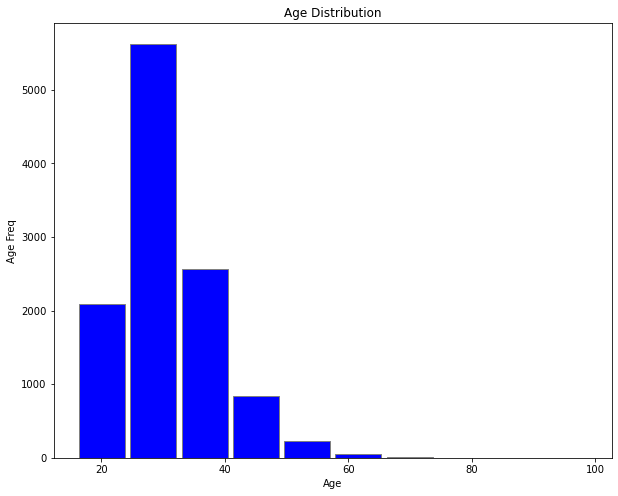

In [73]:
# your code goes here

"""
#Use Formula to get number of bins
q25, q75 = np.percentile(df['Age'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['Age']) ** (-1/3)

#Use Formula to get number of bins
bins = round((df['Age'].max() - df['Age'].min()) / bin_width)

print("One Possible Number of Bins:", bins)
#plt.hist(x, bins=bins);

plt.hist(df['Age'], density=True, bins=bins)  # density=False would make counts
plt.ylabe
l('Probability')
plt.xlabel('Data');

q25, q75 = np.percentile(df['Age'], [25, 75])
bin_width = 2 * (q75 - q25) * len(df['Age']) ** (-1/3)
bins = round((df['Age'].max() - df['Age'].min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(df['Age'], bins=bins);
"""

#plt.figure(figsize=(10, 8), edgecolor='blue')

bin_width=8
bins = round((df['Age'].max() - df['Age'].min()) / bin_width)
histAge = df.hist(column='Age', bins=bins, grid=False, figsize=(10,8), color='blue', edgecolor='grey', zorder=2, rwidth=0.9)
plt.title('Age Distribution')
plt.ylabel('Age Freq')
plt.xlabel('Age')


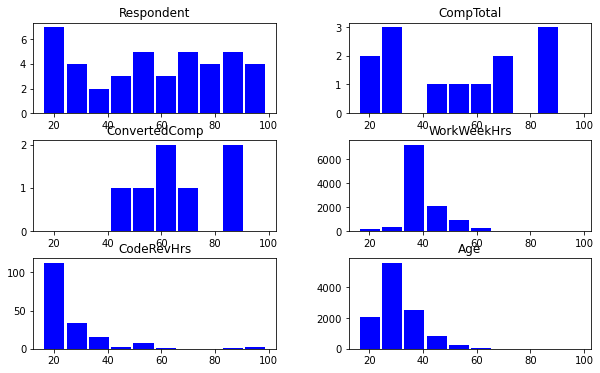

In [74]:
# your code goes here

bins = np.linspace(min(df['Age']), max(df['Age']), 11)   #div into 10 bins

group_names=['16-24', '24-32', '32-40', '40-48', '48-56', '56-64', '64-72', '72-80', '80-88', '88-96']

df['AgeX'] = pd.cut(df['Age'], bins, labels=group_names, include_lowest = True)   #, duplicate='drop')

histAge = df.hist(bins=bins, grid=False, figsize=(10,6), color='blue', zorder=2, rwidth=0.9)   #, data=df['AgeX'])

#histAge = df.hist(bins=bins, labels=group_names, grid=False, figsize=(10,6), color='blue', zorder=2, rwidth=0.9)   #, data=df['AgeX'])


In [75]:
#df['Age'].dtype

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [76]:
# Examining for Null values
NumMResp = df['ConvertedComp'].isnull().sum()   #value_counts()   #number of unique WorkLoc values
NumMResp


0

Text(0.5, 0, 'ConvertedComp ($USD)')

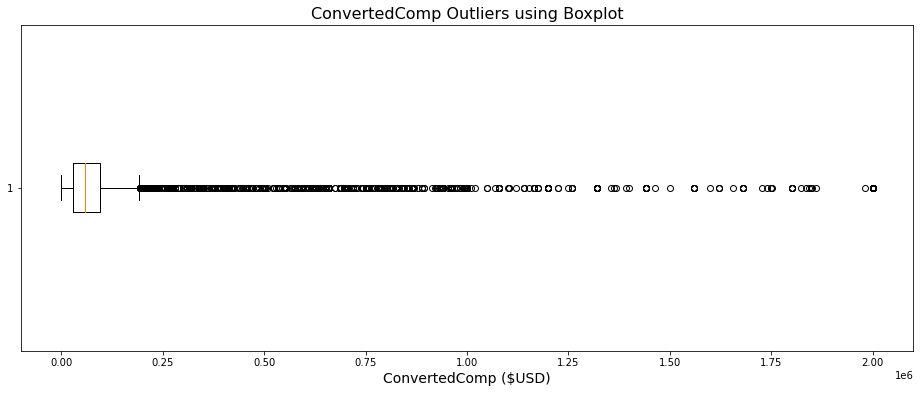

In [77]:
# your code goes 
plt.figure(figsize = (16, 6))
#figure_name = plt.figure(figsize=(width, height))
plt.boxplot(x=df['ConvertedComp'], vert=False)
plt.title('ConvertedComp Outliers using Boxplot', size=16)
plt.xlabel('ConvertedComp ($USD)', size=14)


#Find out the Inter Quartile Range for the column `ConvertedComp`.


In [78]:
# your code goes here
q3, q1 = np.percentile(df['ConvertedComp'], [75 ,25])
IQR = q3 - q1

print('Inter-quartile range for ConvertedComp column: {}'.format(IQR))

Inter-quartile range for ConvertedComp column: 65984.0


Find out the upper and lower bounds.


In [79]:
# your code goes here

"""
print('Uppewr bounds is {}'.format(df['ConvertedComp'] >= (q3 + 1.5*IQR)))
print('Lower bounds is {}'.format(df['ConvertedComp'] >= (q3 - 1.5*IQR)))
"""
uppBounds = print('Upper bounds is {}'.format(q3 + 1.5*IQR))
uppBounds   #print('(Upper Bounds is: " + str(upBounds))

lowBounds = print('Lower bounds is {}'.format(q1 - 1.5*IQR))
lowBounds   #print('(Lower Bounds is: " + str(lowBounds))

Upper bounds is 193976.0
Lower bounds is -69960.0


Identify how many outliers are there in the `ConvertedComp` column.


In [80]:
# your code goes here

"""
amtOutlier = ((df['ConvertedComp'] < (q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (q3 + 1.5 * IQR))).sum() 
amtOutlier
#https://stackoverflow.com/questions/39068214/how-to-count-outliers-for-all-columns-in-pyth"
"""

lowSum = (df['ConvertedComp'] <= (q1 - 1.5 * IQR)).sum()
print('Number of Outliers below Q1 is {}'.format(lowSum))
      
uppSum = (df['ConvertedComp'] >= (q3 + 1.5 * IQR)).sum() 
print('Numberr of Outliers above Q3 is {}'.format(uppSum))
      
numOutlier = lowSum + uppSum   #= sum(a, b)
print('Total Outliers are {}'.format(numOutlier))

Number of Outliers below Q1 is 0
Numberr of Outliers above Q3 is 933
Total Outliers are 933


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [81]:
# your code goes here
# METHOD 1

"""
cols = ['col_1', 'col_2'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
https://www.codegrepper.com/code-examples/python/remove+outlier+columns+pandas
"""
#METHOLD 2
"""
https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

#IQR = Q3 - Q1
"""

upper = np.where(df['ConvertedComp'] >= (q3 + 1.5*IQR))   #Upper bound   
lower = np.where(df['ConvertedComp'] <= (q1 - 1.5*IQR))   #Lower bound

#dfNew = df.loc[(df['ConvertedComp'] <= lower) | (df['ConvertedComp'] >= upper)] - ERROR

mask = (df['ConvertedComp'] < (q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (q3 + 1.5 * IQR))
df[mask] = np.nan
df['ConvertedComp'].mean()

dfNew = df.copy()



In [82]:
# dfNew shape before dropping Outliers

dfNew.shape

(11398, 86)

In [83]:
# Removing Outliers fron New Dataframe

dfNew['ConvertedComp'].drop(upper[0], inplace = True)
dfNew['ConvertedComp'].drop(lower[0], inplace = True)
 
print("New Data now have Shape: ", dfNew.shape)
print("Orig Data now have Shape: ", df.shape)

New Data now have Shape:  (11398, 86)
Orig Data now have Shape:  (11398, 86)


In [84]:
dfNew['ConvertedComp']

0         61000.0
1         95179.0
2         90000.0
3             NaN
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397     57745.0
Name: ConvertedComp, Length: 11398, dtype: float64

In [85]:
if dfNew['WorkWeekHrs'].isnull().sum():  #See if any Missing Values
    meanWork = dfNew['WorkWeekHrs'].mean()
    dfNew['WorkWeekHrs'].replace(np.nan, meanWork, inplace=True)
    
if dfNew['Age'].isnull().sum():  #See if any Missing Values
    meanAge = dfNew['Age'].mean()
    dfNew['Age'].replace(np.nan, meanAge, inplace=True)
    
if dfNew['CompTotal'].isnull().sum():  #See if any Missing Values
    meanComp = dfNew['CompTotal'].mean()
    dfNew['CompTotal'].replace(np.nan, meanComp, inplace=True)
    
if dfNew['ConvertedComp'].isnull().sum():  #See if any Missing Values
    meanCComp = dfNew['ConvertedComp'].mean()
    dfNew['ConvertedComp'].replace(np.nan, meanCComp, inplace=True)
    
if dfNew['CodeRevHrs'].isnull().sum():  #See if any Missing Values
    meanCode = dfNew['CodeRevHrs'].mean()
    dfNew['CodeRevHrs'].replace(np.nan, meanCode, inplace=True)
    

In [86]:
#dfNew['ConvertedComp'].isnull().sum()

In [87]:
# your code goes here - Column MEAN AFTER DROPPING OUTLIERS

print('CONVERTEDCOMP Mean After Dropping Outliers {}'.format(dfNew['ConvertedComp'].mean(),2))


CONVERTEDCOMP Mean After Dropping Outliers 58992.50339225978


In [88]:
dfNew.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,10465.000000,1.139800e+04,11398.000000,11398.000000,11398.000000,11398.000000
mean,12494.160057,7.297042e+05,58992.503392,41.876188,4.802223,30.625512
std,7234.905154,6.630982e+06,38849.606048,23.208439,3.945248,6.941294
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6261.000000,3.000000e+04,29016.000000,40.000000,3.000000,26.000000
50%,12485.000000,7.900000e+04,57745.000000,40.000000,4.781071,30.000000
75%,18802.000000,1.923750e+05,78000.000000,42.000000,5.000000,33.000000
max,25142.000000,3.900000e+08,192500.000000,1012.000000,99.000000,99.000000


In [89]:
# your code goes here - Column MEDIAN
print('Median of CONVERTEDCOMP Colunn is {}'.format(dfNew['ConvertedComp'].median()))


Median of CONVERTEDCOMP Colunn is 57745.0


Text(0.5, 0, 'ConvertedComp ($USD)')

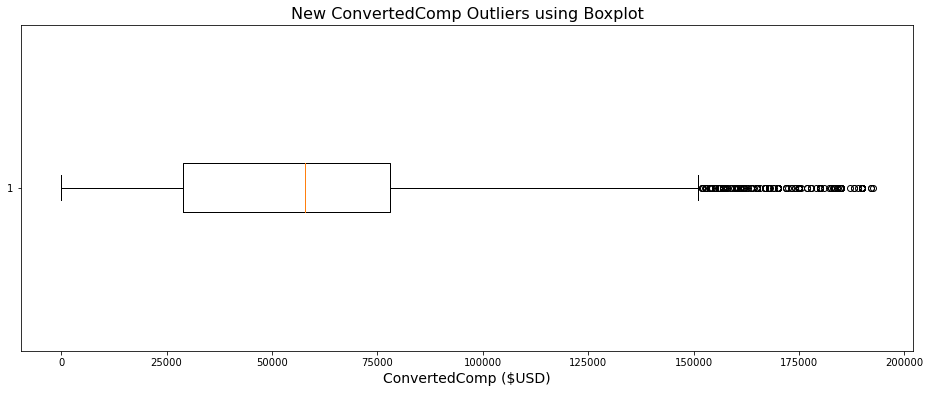

In [90]:
# your code goes 
plt.figure(figsize = (16, 6))
#figure_name = plt.figure(figsize=(width, height))
plt.boxplot(x=dfNew['ConvertedComp'], vert=False)
plt.title('New ConvertedComp Outliers using Boxplot', size=16)
plt.xlabel('ConvertedComp ($USD)', size=14)


In [91]:
# your code goes here

lowSum = (dfNew['ConvertedComp'] <= (q1 - 1.5 * IQR)).sum()
print('Number of Outliers below Q1 is {}'.format(lowSum))
      
uppSum = (dfNew['ConvertedComp'] >= (q3 + 1.5 * IQR)).sum() 
print('Numberr of Outliers above Q3 is {}'.format(uppSum))
      
numOutlier = lowSum + uppSum   #= sum(a, b)
print('Total Outliers are {}'.format(numOutlier))

Number of Outliers below Q1 is 0
Numberr of Outliers above Q3 is 0
Total Outliers are 0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [92]:
if dfNew['WorkWeekHrs'].isnull().sum():  #See if any Missing Values
    meanWork = dfNew['WorkWeekHrs'].mean()
    dfNew['WorkWeekHrs'].replace(np.nan, meanWork, inplace=True)
    
if df['Age'].isnull().sum():  #See if any Missing Values
    meanAge = df['Age'].mean()
    df['Age'].replace(np.nan, meanAge, inplace=True)
    
if df['CompTotal'].isnull().sum():  #See if any Missing Values
    meanComp = df['CompTotal'].mean()
    df['CompTotal'].replace(np.nan, meanComp, inplace=True)
    
if df['ConvertedComp'].isnull().sum():  #See if any Missing Values
    meanCComp = df['ConvertedComp'].mean()
    df['ConvertedComp'].replace(np.nan, meanCComp, inplace=True)
    
if df['CodeRevHrs'].isnull().sum():  #See if any Missing Values
    meanCode = df['CodeRevHrs'].mean()
    df['CodeRevHrs'].replace(np.nan, meanCode, inplace=True)
    

In [100]:
# Temporarily drop column

df.drop(['Respondent'], axis = 1, inplace=True)

In [101]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
CompTotal,1.00,-0.06,0.00,0.02,0.01
ConvertedComp,-0.06,1.00,0.03,-0.08,0.38
WorkWeekHrs,0.00,0.03,1.00,0.03,0.04
CodeRevHrs,0.02,-0.08,0.03,1.00,-0.01
Age,0.01,0.38,0.04,-0.01,1.00


In [105]:
#  Replacing nan values in AGE Column

#qryStkChrt.set_index(['WorkWeekHrs'])

if df['Age'].isnull().sum() > 0:
    meanAge = df['Age'].mean()
    df['Age'] = df['Age'].fillna(meanAge)
    
if df['WorkWeekHrs'].isnull().sum() > 0:
    meanWork = df['WorkWeekHrs'].mean()
    df['WorkWeekHrs'] = df['WorkWeekHrs'].fillna(meanWork)

if df['CodeRevHrs'].isnull().sum() > 0:
    meanCode = df['CodeRevHrs'].mean()
    df['CodeRevHrs'] = df['CodeRevHrs'].fillna(meanCode)

if df['ConvertedComp'].isnull().sum() > 0:
    meanComp = df['ConvertedComp'].mean()
    df['ConvertedComp'] = df['ConvertedComp'].fillna(meanComp)

VARIABLES WITH NEGATIVE CORRELATION WITH AGE: CODREVHRS

In [95]:
# Correlation Using HeatMap - Not Displayed Properly
#Import Modules

"""
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use("seaborn")
 
z = df[['ConvertedCompl', 'WorkWeekHrs', 'CodeRevHrs', 'Age']]

# Plot the heatmap
plt.figure(figsize=(15,15))
heat_map = sns.heatmap(z, linewidth=2.3, annot=True)
plt.title( "SnS HeatMap of Selected Numerical Variables" )
plt.show()
"""

'\nimport numpy as np\nimport seaborn as sns\nimport matplotlib.pylab as plt\nplt.style.use("seaborn")\n \nz = df[[\'ConvertedCompl\', \'WorkWeekHrs\', \'CodeRevHrs\', \'Age\']]\n\n# Plot the heatmap\nplt.figure(figsize=(15,15))\nheat_map = sns.heatmap(z, linewidth=2.3, annot=True)\nplt.title( "SnS HeatMap of Selected Numerical Variables" )\nplt.show()\n'

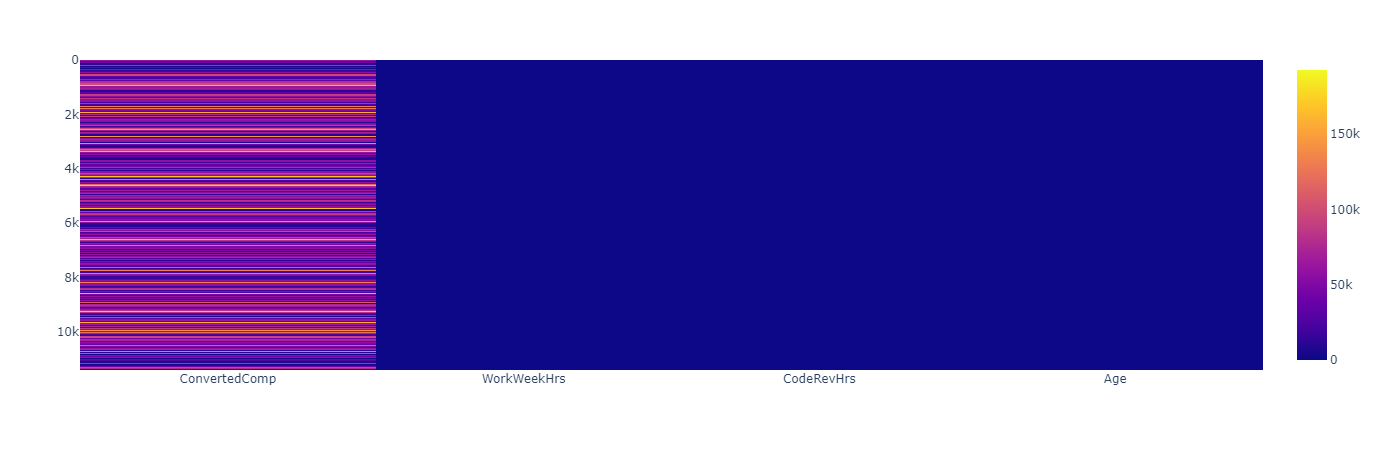

In [106]:
# Correlation Using HeatMap - Not Displayed Properly
#Import Modules
# https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/
import plotly.express as px
 
z = df[['ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs', 'Age']]
fig = px.imshow(z, text_auto=True)

#plt.figure(figsize=(20,20))
#heat_map = sns.heatmap(z, linewidth=2.3, annot=True)
#plt.title( "SnS HeatMap of Selected Numerical Variables" )
fig.show()


In [109]:
# Get printer Pearson Correlation

print('Pearson Correlation {0:8.6f}'.format(pearson_coeff))

Pearson Correlation 0.383360


In [112]:
# Get printer P-Value 

print('P-Value is {0: 15.12f}%'.format(p_value))

P-Value is  0.000000000000%


In [97]:
"""
iqr = df['ConvertedComp'][df['ConvertedComp'].between(df['ConvertedComp'].quantile(.25), df['ConvertedComp'].quantile(.75), inclusive=True)]
q1 = df['ConvertedComp'].quantile(.25)
q3 = df['ConvertedComp'].quantile(.75)
mask = df['ConvertedComp'].between(q1, q3, inclusive=True)
iqr = df.loc[mask, 'ConvertedComp']
iqr_q3_q1 = q3 - q1
print(iqr)
print('The IQR for the q1 and q3:', iqr_q3_q1)
"""

"\niqr = df['ConvertedComp'][df['ConvertedComp'].between(df['ConvertedComp'].quantile(.25), df['ConvertedComp'].quantile(.75), inclusive=True)]\nq1 = df['ConvertedComp'].quantile(.25)\nq3 = df['ConvertedComp'].quantile(.75)\nmask = df['ConvertedComp'].between(q1, q3, inclusive=True)\niqr = df.loc[mask, 'ConvertedComp']\niqr_q3_q1 = q3 - q1\nprint(iqr)\nprint('The IQR for the q1 and q3:', iqr_q3_q1)\n"

In [98]:
# Correlation Using Corr Function - Getting correlation of all variables with AGE

df.corr()['Age']

Respondent       0.004330
CompTotal        0.006385
ConvertedComp    0.383360
WorkWeekHrs      0.036724
CodeRevHrs      -0.014199
Age              1.000000
Name: Age, dtype: float64

In [99]:
"""
iqr = df['ConvertedComp'][df['ConvertedComp'].between(df['ConvertedComp'].quantile(.25), df['ConvertedComp'].quantile(.75), inclusive=True)]
q1 = df['ConvertedComp'].quantile(.25)
q3 = df['ConvertedComp'].quantile(.75)
mask = df['ConvertedComp'].between(q1, q3, inclusive=True)
iqr = df.loc[mask, 'ConvertedComp']
iqr_q3_q1 = q3 - q1
print(iqr)
print('The IQR for the q1 and q3:', iqr_q3_q1)
"""

"\niqr = df['ConvertedComp'][df['ConvertedComp'].between(df['ConvertedComp'].quantile(.25), df['ConvertedComp'].quantile(.75), inclusive=True)]\nq1 = df['ConvertedComp'].quantile(.25)\nq3 = df['ConvertedComp'].quantile(.75)\nmask = df['ConvertedComp'].between(q1, q3, inclusive=True)\niqr = df.loc[mask, 'ConvertedComp']\niqr_q3_q1 = q3 - q1\nprint(iqr)\nprint('The IQR for the q1 and q3:', iqr_q3_q1)\n"

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja

## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
